In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Covid_data.csv",thousands=',',skipinitialspace=True)

In [3]:
df.drop('Unnamed: 0',inplace=True,axis =1)

### 1. Check NaN values

In [4]:
df.head()

,country,continent,total_cases,new_cases,total_deaths,new_deaths,total_recovered,active_cases,serious,cases/1M_pop,deaths/1M_pop,total_tests,tests/1M_pop,population,Date
0,China,Asia,82995,2.0,4634.0,NaN,78288.0,73.0,4.0,58.0,3.0,NaN,NaN,1.439324e+09,2020-05-28
1,USA,North America,1768461,22658.0,103330.0,1223.0,498725.0,1166406.0,17202.0,5346.0,312.0,16331312.0,49365.0,3.308276e+08,2020-05-28
2,Brazil,South America,438812,24151.0,26764.0,1067.0,193181.0,218867.0,8318.0,2066.0,126.0,871839.0,4104.0,2.124222e+08,2020-05-28
3,Russia,Europe,379051,8371.0,4142.0,174.0,150993.0,223916.0,2300.0,2598.0,28.0,9701280.0,66479.0,1.459290e+08,2020-05-28
4,Spain,Europe,284986,1137.0,27119.0,1.0,196958.0,60909.0,854.0,6096.0,580.0,3556567.0,76071.0,4.675320e+07,2020-05-28


In [5]:
nan_values =[]
for i in df.columns:
    nan_values.append(df[i].isnull().sum()/len(df[i]))

In [6]:
nan_values_df = pd.DataFrame(nan_values,index=df.columns,columns=['NaN_Percent'])
nan_values_df

,NaN_Percent
country,0.000000
continent,0.000000
total_cases,0.000000
new_cases,0.333023
total_deaths,0.139907
new_deaths,0.623814
total_recovered,0.021767
active_cases,0.017116
serious,0.393116
cases/1M_pop,0.009302


Qua việc xem xét dữ liệu ta thấy được số lượng NaN values được chia làm 2 kiểu. Kiểu 1 là **bỏ trống** 2 là **inf**. Với những ô bỏ trống ta sẽ fill các ô đó với giá trị 0 còn với các giá trị "inf" ta sẽ fill nó với giá trị mean của tập dataset 

### 2. Pre_processing 

In [7]:
def PRE_PROCESS(frame):
    MEAN = df['total_cases'].mean()
    frame['total_cases'].replace(np.inf,MEAN,inplace=True) #pre-process total_cases
    frame['new_cases'].replace(np.nan,0,inplace=True) # pre-process new_cases
# pre-process total_deaths
    MEAN = df['total_deaths'].mean()
    frame['total_deaths'].replace(np.inf,MEAN,inplace=True) 
    frame['total_deaths'].replace(np.nan,0,inplace=True)
# pre-process new_deaths
    frame['new_deaths'].replace(np.nan,0,inplace=True)
# pre-process total_recovered
    MEAN = df['total_recovered'].mean()
    frame['total_recovered'].replace(np.inf,MEAN,inplace=True) 
    frame['total_recovered'].replace(np.nan,0,inplace=True)
# pre-process active_cases
    MEAN = df['active_cases'].mean()
    frame['active_cases'].replace(np.inf,MEAN,inplace=True) 
    frame['active_cases'].replace(np.nan,0,inplace=True)
# pre-process serious
    MEAN = df['serious'].mean()
    frame['serious'].replace(np.inf,MEAN,inplace=True) 
    frame['serious'].replace(np.nan,0,inplace=True)

In [8]:
PRE_PROCESS(df)

### 3. Xem dtypes của các trường dữ liệu

In [9]:
dtypes =[]
for i in df.columns:
    dtypes.append(df[i].dtypes)

In [10]:
dtypes_df = pd.DataFrame(dtypes,index=df.columns,columns=['Dtypes'])
dtypes_df

,Dtypes
country,object
continent,object
total_cases,int64
new_cases,float64
total_deaths,float64
new_deaths,float64
total_recovered,float64
active_cases,float64
serious,float64
cases/1M_pop,float64


### 4. Histogram and box plot

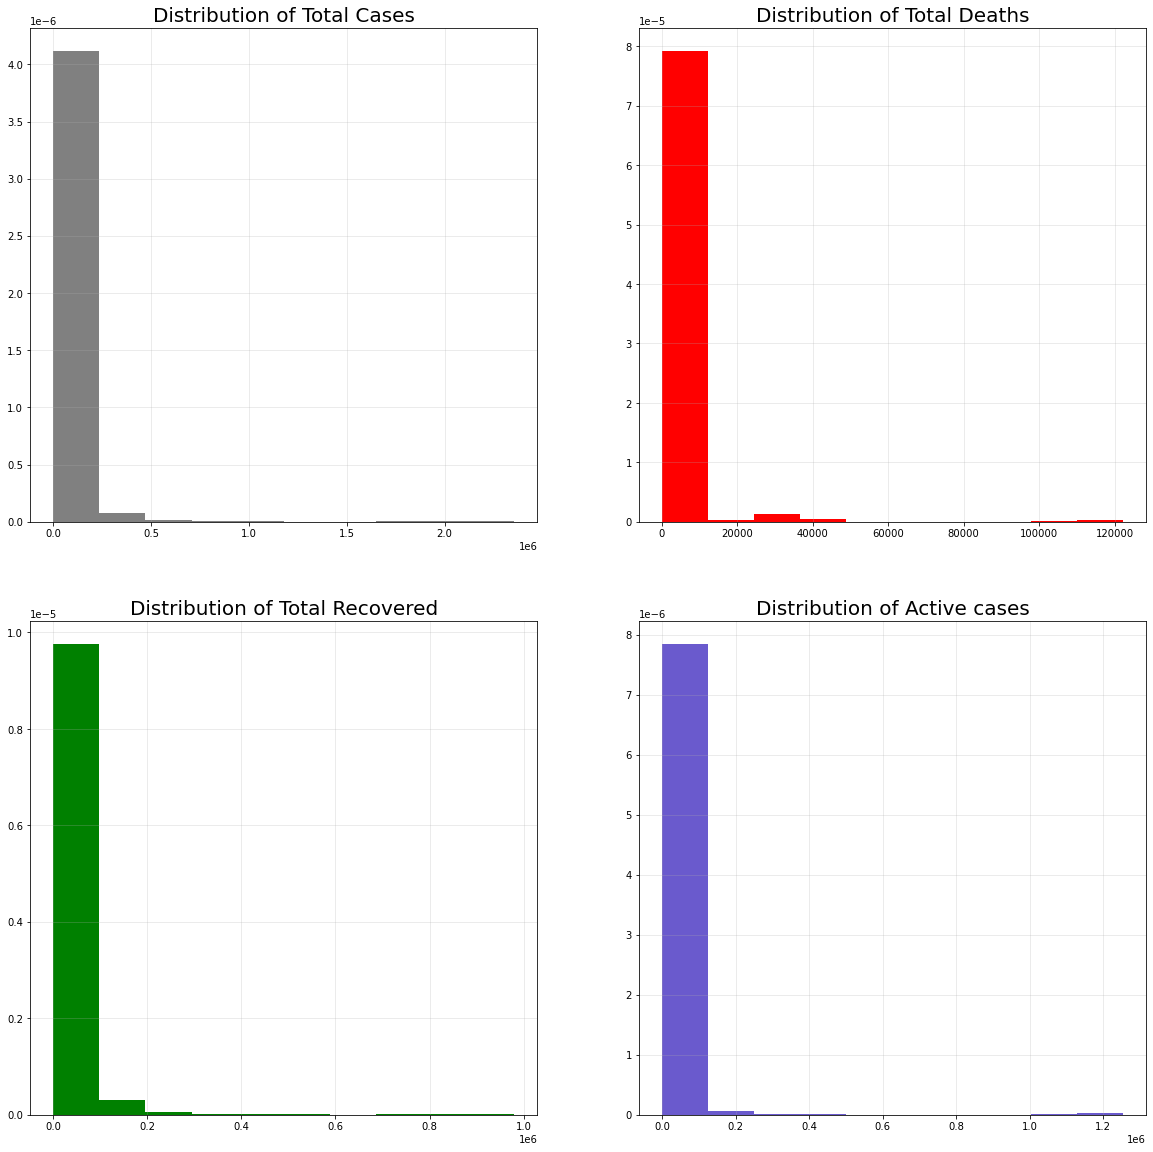

In [13]:
from scipy import stats
f, ax = plt.subplots(2,2, figsize=(20,20))

ax[0,0].hist(df['total_cases'], density=True, color="gray")
ax[0,0].set_title("Distribution of Total Cases",fontsize=20)
ax[0, 0].grid(alpha=0.3,which='both')

ax[0,1].hist(df['total_deaths'], density=True,  color = "red")
ax[0,1].set_title("Distribution of Total Deaths",fontsize=20)
ax[0,1].grid(alpha=0.3,which='both')

ax[1,0].hist(df['total_recovered'], density=True, color = "green")
ax[1,0].set_title("Distribution of Total Recovered",fontsize=20)
ax[1,0].grid(alpha=0.3,which='both')

ax[1,1].hist(df['active_cases'], density=True, color = "slateblue")
ax[1,1].set_title("Distribution of Active cases",fontsize=20)
ax[1,1].grid(alpha=0.3,which='both')

In [14]:
# Loại bỏ nhiễu 
def removeNoisy(A, lower, higher):
    v_lower = np.quantile(A, lower)
    v_higher = np.quantile(A, higher)
    X = [x for x in A if x<v_higher and x>v_lower]
    return X 

In [15]:
df['total_cases']

0         82995
1       1768461
2        438812
3        379051
4        284986
         ...   
5370          7
5371          6
5372          4
5373          3
5374          1
Name: total_cases, Length: 5375, dtype: int64

Text(0.5, 1.0, 'Box plot (Active Cases)')

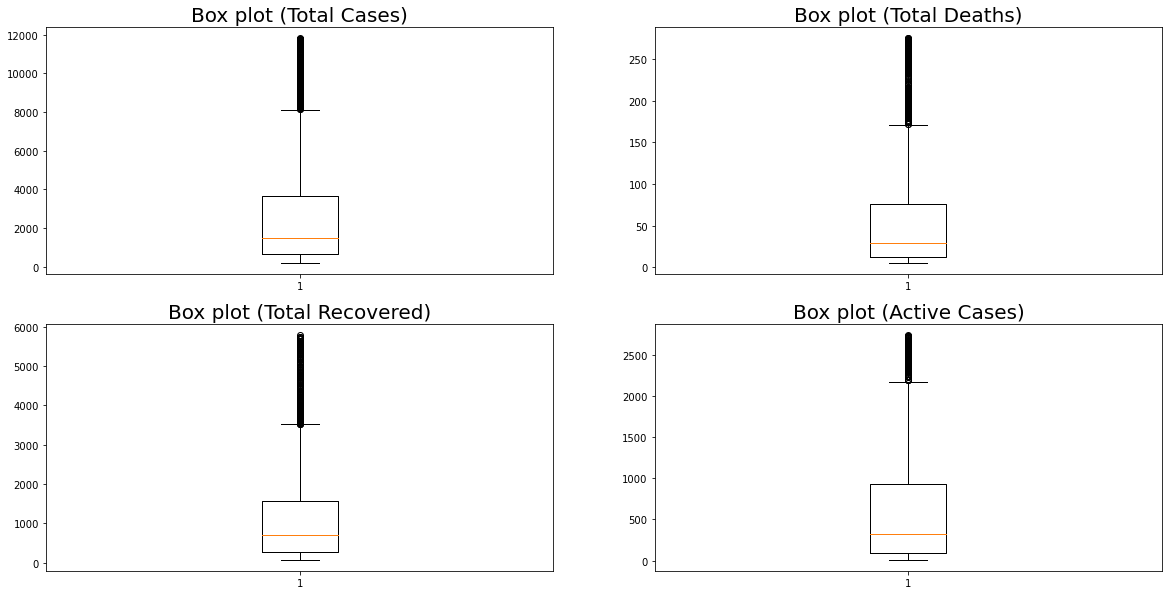

In [16]:
plt.figure(figsize=(20, 10))

Total_Cases = removeNoisy(df['total_cases'], 0.25, 0.75)
#print(Total_Cases)
plt.subplot(2,2,1)
plt.boxplot(Total_Cases)
plt.title("Box plot (Total Cases)",fontsize=20)

Total_Deaths = removeNoisy(df['total_deaths'], 0.25, 0.75)
plt.subplot(2,2,2)
plt.boxplot(Total_Deaths)
plt.title("Box plot (Total Deaths)",fontsize=20)

Total_Recovered = removeNoisy(df['total_recovered'], 0.25, 0.75)
plt.subplot(2,2,3)
plt.boxplot(Total_Recovered)
plt.title("Box plot (Total Recovered)",fontsize=20)

Active_Cases = removeNoisy(df['active_cases'], 0.25, 0.75)
plt.subplot(2,2,4)
plt.boxplot(Active_Cases)
plt.title("Box plot (Active Cases)",fontsize=20)